## Expected Risk Minimization 
Consider a binary classification problem with the following loss matrix -
$$
   {\begin{array}{ccccc}
   & & \text{Predicted class} & \text{           } &\\
   & & C1 & C2 & Reject\\
   \text{True class} & C1 & 0 & 3 & c  \\
   & C2 & 2 & 0 & c \\
  \end{array} } 
$$
where the cost of rejection is a constant. Determine the prediction that minimizes the expected loss in different ranges of $P(C1|x)$ for the following three cases - 
1. c = 0
2. c = 2
3. c = 1

In [70]:
import numpy as np
import matplotlib.pyplot as plt

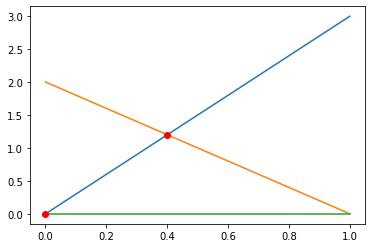

[0.399]
[]
[0.]


In [88]:
x = np.arange(0, 1000)/1000
pred_c1_loss = 3*x
pred_c2_loss = 2*(1-x)
reject_loss = 0*np.ones(1000)
plt.plot(x, pred_c1_loss, '-')
plt.plot(x, pred_c2_loss, '-')
plt.plot(x, reject_loss, '-')
idx_1 = np.argwhere(np.diff(np.sign(pred_c1_loss - pred_c2_loss))).flatten()
idx_2 = np.argwhere(np.diff(np.sign(reject_loss - pred_c2_loss))).flatten()
idx_3 = np.argwhere(np.diff(np.sign(reject_loss - pred_c1_loss))).flatten()
plt.plot(x[idx_1], pred_c1_loss[idx_1], 'ro')
plt.plot(x[idx_2], pred_c2_loss[idx_2], 'ro')
plt.plot(x[idx_3], pred_c1_loss[idx_3], 'ro')
plt.show()
print(x[idx_1])
print(x[idx_2])
print(x[idx_3])


Because there is 0 cost of rejection, always reject.

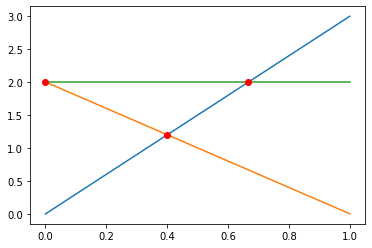

[0.399]
[0.]
[0.666]


In [87]:
x = np.arange(0, 1000)/1000
pred_c1_loss = 3*x
pred_c2_loss = 2*(1-x)
reject_loss = 2*np.ones(1000)
plt.plot(x, pred_c1_loss, '-')
plt.plot(x, pred_c2_loss, '-')
plt.plot(x, reject_loss, '-')
idx_1 = np.argwhere(np.diff(np.sign(pred_c1_loss - pred_c2_loss))).flatten()
idx_2 = np.argwhere(np.diff(np.sign(reject_loss - pred_c2_loss))).flatten()
idx_3 = np.argwhere(np.diff(np.sign(reject_loss - pred_c1_loss))).flatten()
plt.plot(x[idx_1], pred_c1_loss[idx_1], 'ro')
plt.plot(x[idx_2], pred_c2_loss[idx_2], 'ro')
plt.plot(x[idx_3], pred_c1_loss[idx_3], 'ro')
plt.show()
print(x[idx_1])
print(x[idx_2])
print(x[idx_3])


If P(c1|x) > 2/5 then predict C1  
If P(c1|x) < 2/5 then predict C2 

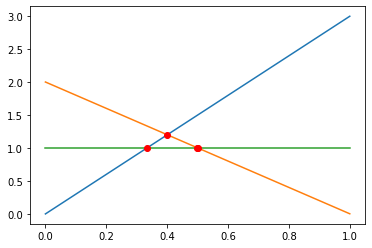

[0.399]
[0.499 0.5  ]
[0.333]


In [86]:
x = np.arange(0, 1000)/1000
pred_c1_loss = 3*x
pred_c2_loss = 2*(1-x)
reject_loss = 1*np.ones(1000)
plt.plot(x, pred_c1_loss, '-')
plt.plot(x, pred_c2_loss, '-')
plt.plot(x, reject_loss, '-')
idx_1 = np.argwhere(np.diff(np.sign(pred_c1_loss - pred_c2_loss))).flatten()
idx_2 = np.argwhere(np.diff(np.sign(reject_loss - pred_c2_loss))).flatten()
idx_3 = np.argwhere(np.diff(np.sign(reject_loss - pred_c1_loss))).flatten()
plt.plot(x[idx_1], pred_c1_loss[idx_1], 'ro')
plt.plot(x[idx_2], pred_c2_loss[idx_2], 'ro')
plt.plot(x[idx_3], pred_c1_loss[idx_3], 'ro')
plt.show()
print(x[idx_1])
print(x[idx_2])
print(x[idx_3])


If P(c1|x) > 1/2 then predict C1  
If 1/2 > P(c1|x) > 1/3 then reject  
If P(c1|x) < 1/3 then predict C2 

# Churn Prediction

I use sklearn [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and transformers here.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('HW 4//q3.csv', delimiter=',')
df.shape
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
churned = df.groupby(['Exited']).size() / df['Exited'].size
churn_fraction = churned[1]*100
print(round(churn_fraction,4),'% of users churn')

20.37 % of users churn


20.1843 % of credit card users churn
20.8149 % of non credit card users churn


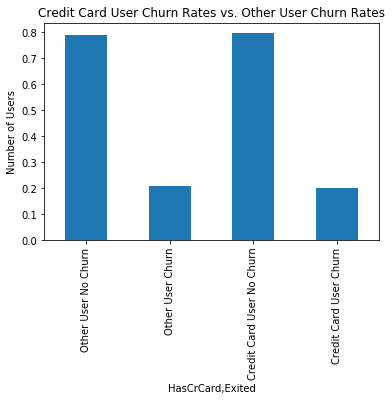

In [25]:
churned_by_card = df.groupby(['HasCrCard','Exited']).size()
churned_by_card_pct = churned_by_card / df.groupby(['HasCrCard']).size()
print(round(churned_by_card_pct[1][1]*100,4),'% of credit card users churn')
print(round(churned_by_card_pct[0][1]*100,4),'% of non credit card users churn')
plot = churned_by_card_pct.plot.bar()
plot.set_title('Credit Card User Churn Rates vs. Other User Churn Rates')
plot.set_ylabel('Number of Users')
plot.set_xticklabels(('Other User No Churn', 'Other User Churn', 'Credit Card User No Churn', 'Credit Card User Churn'))
plt.show()

### Credit card users are not more likely to churn.

In [32]:
df_train = df.sample(frac=0.8,random_state=11)
df_test = df.drop(df_train.index)

from sklearn.base import BaseEstimator, TransformerMixin
# We provide the required transformers to build the pipeline.
# Transfomer for performing one hot encoding on a specified categorical column
class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self  
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
class ConcatFeatures(BaseEstimator, TransformerMixin):
    
    def __init__(self,cols,sep="_"):
        self.cols = cols
        self.sep = sep
                
    def transform(self, X):
        concat_col = self.sep.join(self.cols)
        return X.apply(lambda x : self.sep.join([x[col] for col in self.cols]) ,axis=1).to_frame(name = concat_col)

    def fit(self, X, y=None):
        return self  

In [33]:
# Transformer that does min-max transform on the specified columns
# This needs to be rerun and checked again
class MinMaxTransform(BaseEstimator, TransformerMixin):

    def __init__(self,cols=None):
        self.cols = cols
        self.minVec = np.zeros(len(cols))
        self.maxVec = np.zeros(len(cols))
       
    def transform(self, X):
        X[self.cols] = ((X[self.cols] - self.minVec)/(self.maxVec-self.minVec))
        return X

    def fit(self, X, y=None):
        self.minVec = (df_train[self.cols].min())
        self.maxVec = (df_train[self.cols].max())
        return self

In [59]:
from sklearn.pipeline import Pipeline

# Define X and Y train
X_train = df_train.drop('Exited',axis=1)
y_train = df_train['Exited']

# Define X and Y test
X_test = df_test.drop('Exited',axis=1)
y_test = df_test['Exited']

# Get numeric and categorical features 
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

continuous_transformer = Pipeline(steps = [('scaler', MinMaxTransform())])
categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder(categorical_features))])

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

logit_mod = Pipeline(steps = [('preprocessor', preprocessor),
                             ('classifier',LogisticRegression())])

logit_mod.fit(X_train,y_train)
y_pred = logit_mod.predict(X_test)
y_probas = logit_mod.predict_proba(X_test)[:,1]

In [72]:
f1score = round(f1_score(y_test,y_pred),4)

rocaucscore = round(roc_auc_score(y_test,y_probas),4)

print('F1 Score:',f1score)
print('Area Under ROC score:', rocaucscore)

#roc_curve, roc_auc_score

F1 Score: 0.3187
Area Under ROC score: 0.7963


In [73]:
# Ratio of balance to salary
X_train['balance2salary'] = X_train['Balance']/X_train['EstimatedSalary']
X_test['balance2salary'] = X_test['Balance']/X_test['EstimatedSalary']

# Ratio of tenure to age
X_train['tenure2age'] = X_train['Tenure']/X_train['Age']
X_test['tenure2age'] = X_test['Tenure']/X_test['Age']

# Ratio of credit score to age
X_train['score2age'] = X_train['CreditScore']/X_train['Age']
X_test['score2age'] = X_test['CreditScore']/X_test['Age']

In [65]:
# New Numerical Features
numeric_features_2 = X_train.select_dtypes(include=['int64', 'float64']).columns

# New Categorical Features
categorical_features_2 = X_train.select_dtypes(include=['object']).columns

# Transformers
continuous_transformer_2 = Pipeline(steps = [('scaler', MinMaxTransform())])
categorical_transformer_2 = Pipeline(steps = [('onehot',OneHotEncoder(categorical_features))])

# Define Preprocessor
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', continuous_transformer_2, numeric_features_2),
        ('cat', categorical_transformer_2, categorical_features_2)])

In [74]:
# Balanced Logistic Regression Classifier
logit_mod_2 =Pipeline(steps = [('preprocessor', preprocessor),
                             ('classifier',LogisticRegression(class_weight='balanced'))])
logit_mod_2.fit(X_train,y_train)
y_pred_2 = logit_mod_2.predict(X_test)
y_probas_2 = logit_mod_2.predict_proba(X_test)[::,1]

In [75]:
f1score_2 = round(f1_score(y_test,y_pred_2),4)

rocaucscore_2 = round(roc_auc_score(y_test,y_probas_2),4)

print('F1 Score:',f1score_2)
print('Area under ROC score:', rocaucscore_2)

#roc_curve, roc_auc_score

F1 Score: 0.5146
Area under ROC score: 0.7995


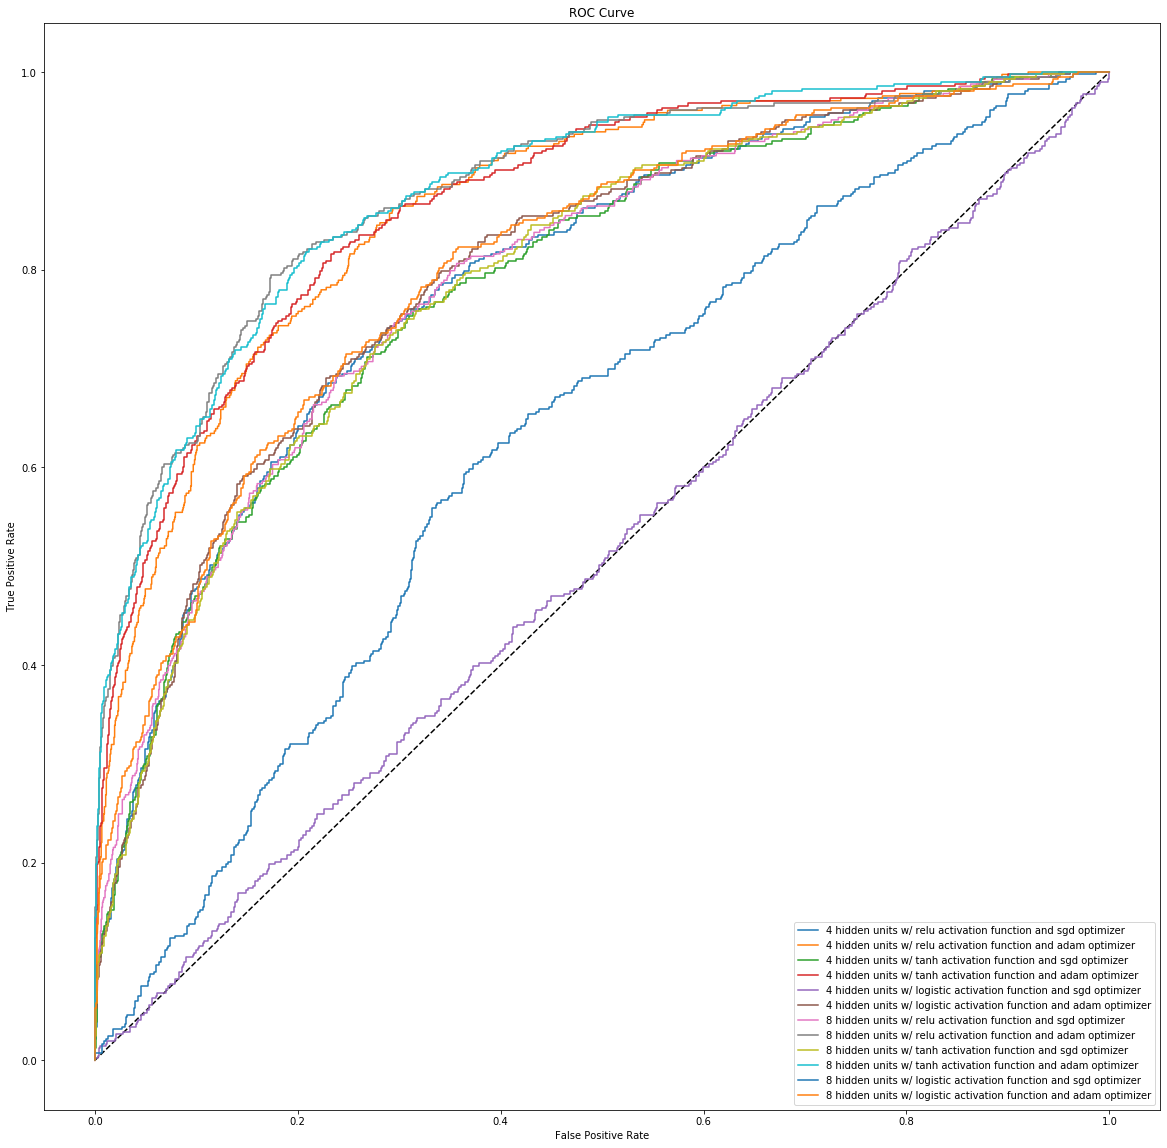

In [78]:
# different parameters

from sklearn import metrics

# Hidden Layers
hls = [4,8]
# Activation Functions
a = ['relu','tanh','logistic']
# Optimizers
s = ['sgd','adam']

# Create empty list
mlps = []

# Store f1 scores
f1scores = dict()
plt.figure(figsize=(20,20))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
for i in range(len(hls)):
    for j in range(len(a)):
        for k in range(len(s)):
            mlp = Pipeline(steps = [('preprocessor', preprocessor),
                             ('MLP',MLPClassifier(hidden_layer_sizes = hls[i],
                                                 activation = a[j],
                                                 solver = s[k]))])

            mlp.fit(X_train,y_train)
            mlp_pred = mlp.predict(X_test)
            
            probability = mlp.predict_proba(X_test)[:,1]
            fpr, tpr, thresh = roc_curve(y_test,probability)
            
            curve_label = str(hls[i]) + ' hidden units w/ ' + str(a[j]) + ' activation function and ' +str(s[k]) + ' optimizer'
            plt.plot(fpr, tpr,label = curve_label)
            plt.title('ROC Curve')
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            plt.legend(loc = 'lower right')
            
            f1score_mlp = round(f1_score(y_test,mlp_pred),4)
            f1scores[curve_label] = f1score_mlp
            mlps.append(mlp)
            fpr, tpr, thresh = roc_curve(y_test,mlp_pred)

plt.show()
            
        

In [79]:
import operator

best_f1 = max(f1scores.items(), key=operator.itemgetter(1))[1]
best_combination = max(f1scores.items(), key=operator.itemgetter(1))[0]

print('Best F1 Score:',best_f1)
print('Best Combination:',best_combination)

Best F1 Score: 0.5841
Best Combination: 8 hidden units w/ tanh activation function and adam optimizer


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

mlp_best = Pipeline(steps = [('preprocessor', preprocessor),
                             ('MLP',MLPClassifier(hidden_layer_sizes = 10,
                                                 activation = 'relu',
                                                 solver = 'adam'))])

clf_gaussian =Pipeline(steps = [('preprocessor', preprocessor),
                             ('classifier',GaussianNB())])
clf_dt = Pipeline(steps = [('preprocessor', preprocessor),
                             ('classifier',DecisionTreeClassifier())])

logit_mod_2.fit(X_train,y_train)
mlp_best.fit(X_train,y_train)
clf_gaussian.fit(X_train,y_train)
clf_dt.fit(X_train,y_train)

prob_1 = logit_mod_2.predict_proba(X_test)[:,1]
fpr_1, tpr_1, thresh_1 = roc_curve(y_test,prob_1)

prob_2 = mlp_best.predict_proba(X_test)[:,1]
fpr_2, tpr_2, thresh_2 = roc_curve(y_test,prob_2)

prob_3 = clf_gaussian.predict_proba(X_test)[:,1]
fpr_3, tpr_3, thresh_3 = roc_curve(y_test,prob_3)

prob_4 = clf_dt.predict_proba(X_test)[:,1]
fpr_4, tpr_4, thresh_4 = roc_curve(y_test,prob_4)

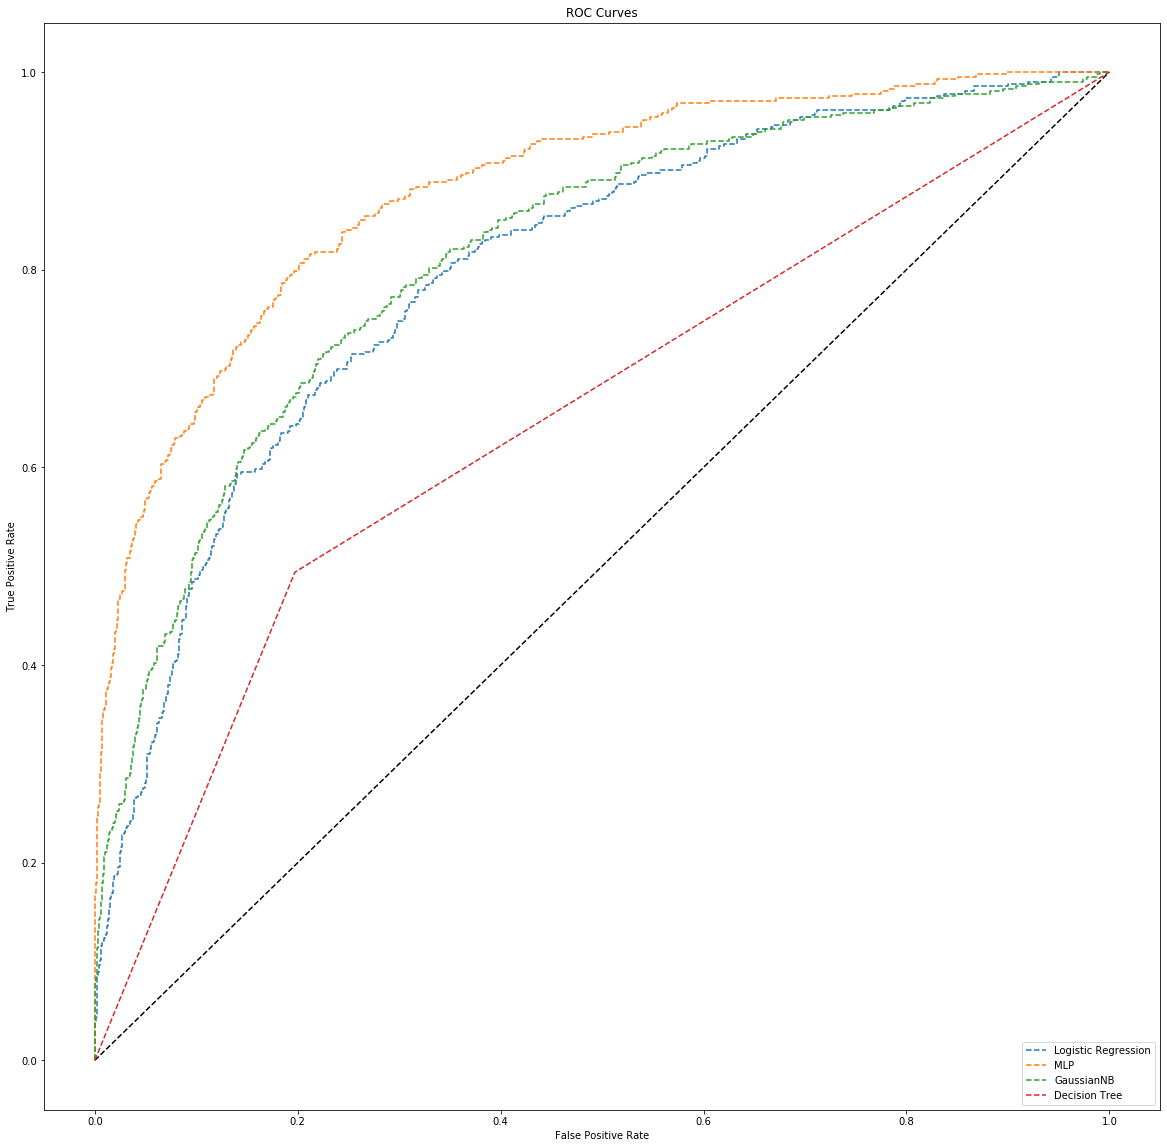

In [70]:
plt.figure(figsize=(20,20))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
label_list  = ['Logistic Regression','MLP','GaussianNB','Decision Tree']
fpr_list = [fpr_1,fpr_2,fpr_3,fpr_4]
tpr_list = [tpr_1,tpr_2,tpr_3,tpr_4]

for i in range(4):
    plt.plot(fpr_list[i], tpr_list[i],'--',label = label_list[i])
    
plt.title('ROC Curves')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')

### The calibration curve gives you a way of testing if your model is well-calibrated or not. Use sklearn's [calibration_curve](https://scikit-learn.org/stable/modules/generated/sklearn.calibration.calibration_curve.html)

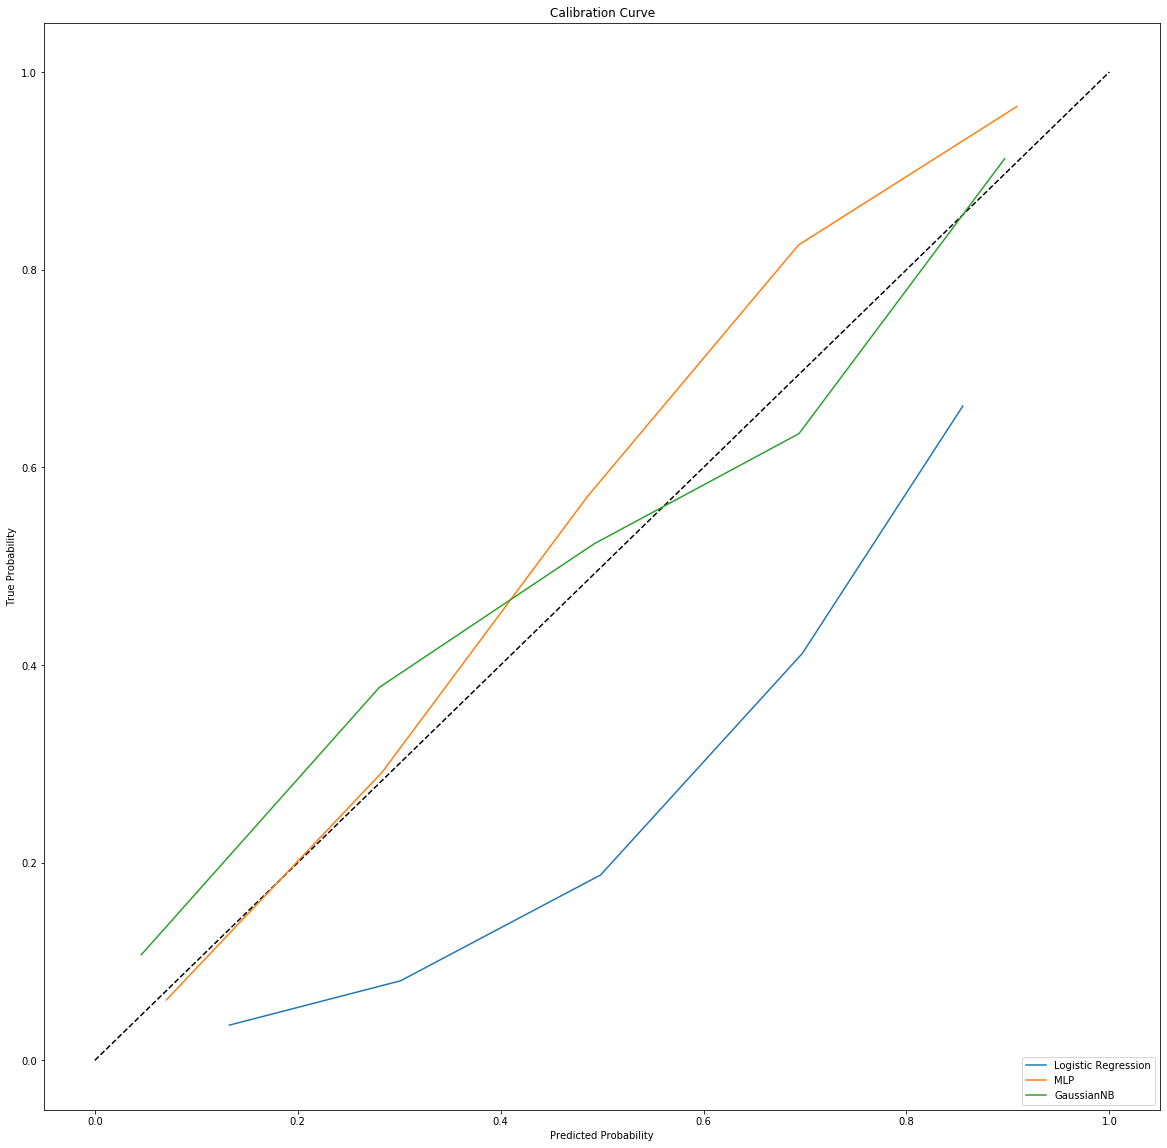

In [71]:
from sklearn.calibration import calibration_curve

logit_y, logit_x = calibration_curve(y_test,prob_1)
MLP_y, MLP_x = calibration_curve(y_test,prob_2)
GausNB_y, GausNB_x = calibration_curve(y_test,prob_3)


plt.figure(figsize=(20,20))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.plot(logit_x,logit_y, label = 'Logistic Regression')
plt.plot(MLP_x,MLP_y,label = 'MLP')
plt.plot(GausNB_x,GausNB_y,label = 'GaussianNB')


plt.title('Calibration Curve')
plt.ylabel('True Probability')
plt.xlabel('Predicted Probability')
plt.legend(loc = 'lower right')

The MLP and GaussianNB hug tightly to the straight line y=x therefore they are well calibrated models and logistic regression is not.